# Problem Statement
An education company named X Education sells online courses to industry professionals. 
On any given day, many professionals who are interested in the courses land on their website and browse for courses.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.

When these people fill up a form providing their email address or phone number, they are classified to be a lead. 
Moreover, the company also gets leads through past referrals.Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. 
The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

# Goal
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be
used by the company to target potential leads. A higher score would mean that the lead is hot, 
i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

Also the management wants to acheive the Conversion Rate of 80% 

# Step 1: Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the neccessary libraries



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
# load and view the data set



df= pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# check data set dimensions
df.shape

(9240, 37)

In [5]:
# check the dataset info related to the dataset




df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2: Data Cleaning and visualization

In [7]:
# check fot the null value percentages in the dataset



round(df.isnull().sum()* 100 / len(df),1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   15.6
How did you hear about X Education               23.9
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [8]:
df = df.replace('Select', np.nan)

In [9]:
round(df.isnull().sum()* 100 / len(df),1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [10]:
# Dropping colums with more than 40% null values

df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>40)].columns, 1)

In [11]:
## Dealing with columns with high null value one by one

In [12]:
round(df.isnull().sum()* 100 / len(df),1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [13]:
## Dealing with missing values in city
df.City.describe()


count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

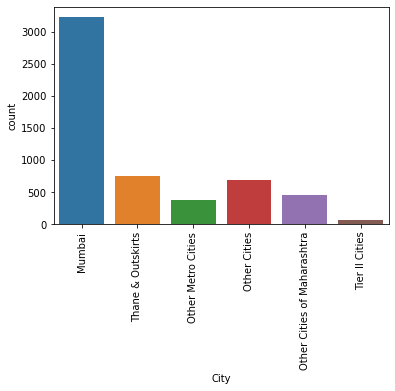

In [14]:
sns.countplot(df.City)
xticks(rotation = 90)

In [15]:
# Around 60% of the data is Mumbai so we can replace Mumbai with the missing values.


In [16]:
df['City'] = df['City'].replace(np.nan, 'Mumbai')

In [17]:
round(100*(df.isnull().sum()/len(df.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [18]:
## dealing with specialisation column

In [19]:
df.Specialization.describe()


count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

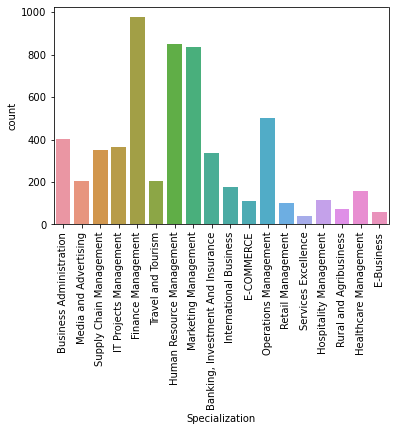

In [20]:
sns.countplot(df.Specialization)
xticks(rotation = 90)
plt.show()

In [21]:
## it maybe possible that the lead has specialization out of this list or is a non-working professional. So, we we make another category called others and use the same instead of missing values.

In [22]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')


In [23]:
df.Specialization.describe()

count       9240
unique        19
top       Others
freq        3380
Name: Specialization, dtype: object

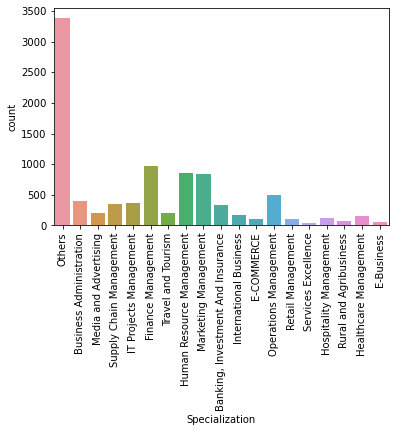

In [24]:
sns.countplot(df.Specialization)
xticks(rotation = 90)
plt.show()

In [25]:
round(100*(df.isnull().sum()/len(df.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [26]:
# dealing with tags column
df.Tags.describe()


count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

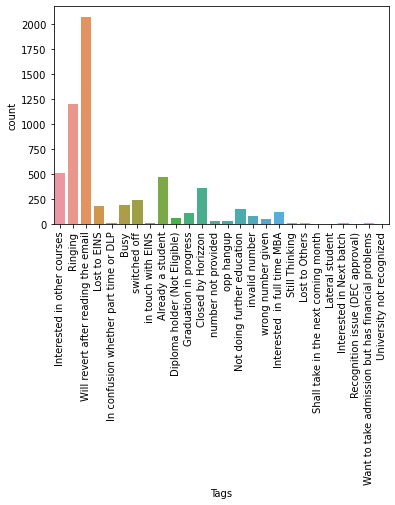

In [27]:
sns.countplot(df.Tags)
xticks(rotation = 90)
plt.show()

In [28]:
## Replace the missing values with " Will revert after reading the mail ", as it has the highest frequency

In [29]:
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

In [30]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [31]:
df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

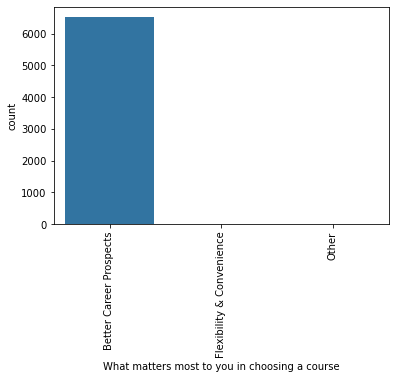

In [32]:
sns.countplot(df['What matters most to you in choosing a course'])
xticks(rotation = 90)
plt.show()

In [33]:
df= df.drop(['What matters most to you in choosing a course'], axis=1)

In [34]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                               0.00
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [35]:
df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

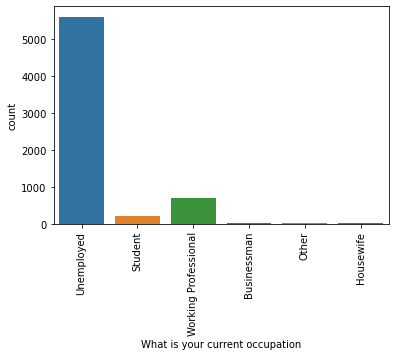

In [36]:
sns.countplot(df['What is your current occupation'])
xticks(rotation = 90)
plt.show()

In [37]:
## Replace missing values with "Unemployed"

In [38]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')


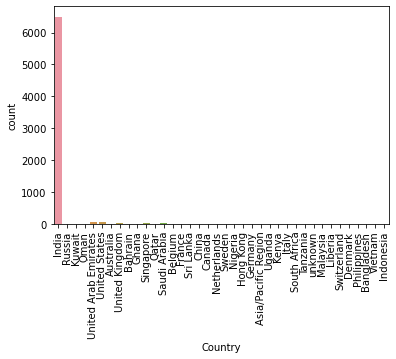

In [39]:
## Dealing with country
sns.countplot(df['Country'])
xticks(rotation = 90)
plt.show()

In [40]:
## Dropping the column because of high imbalance

In [41]:
df= df.drop(['Country'], axis=1)


In [42]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [43]:
# Rest missing values are under 2% so we can drop these rows.
df.dropna(inplace = True)


In [44]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [45]:
## Now all missing values are sorted

# Step 3: Univariate analysis

In [46]:
## average conversion rate 
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

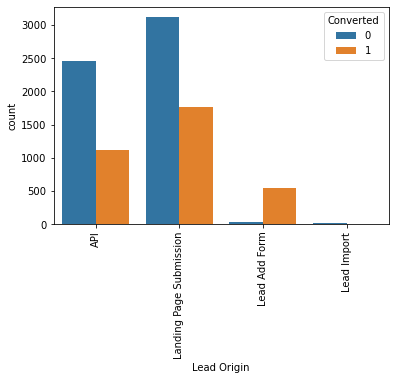

In [47]:
## Average conversion rate classified by lead origin

sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

In [48]:
# we see that the conversion rate is 30-35% (close to average) for API and Landing page submission. But very low for Lead Add form and Lead import

In [49]:
## Therefore we can intervene that we need to focus more on the leads originated from API and Landing page submission.

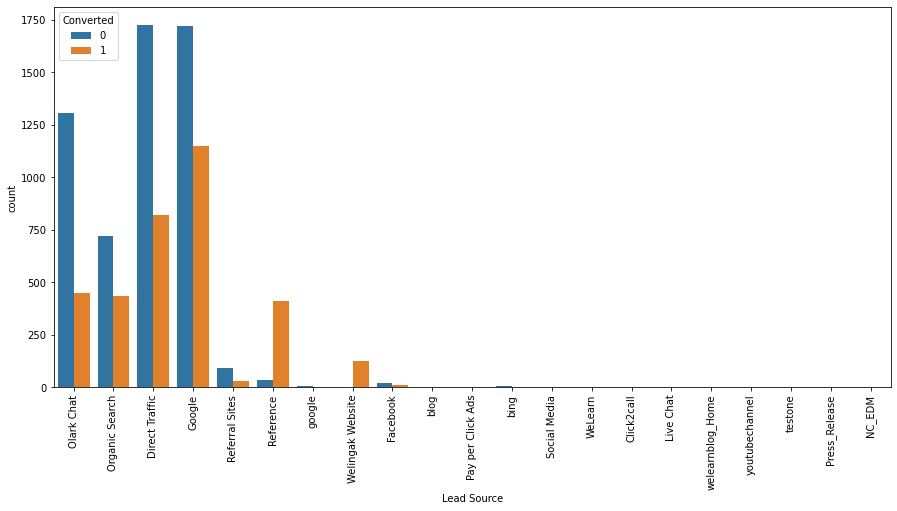

In [50]:
## Evaluating Lead source with conversion. 

fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

In [51]:
## we see similar columns entered twice. And a lot of different columns with low values, so that they can be clubbed together.
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


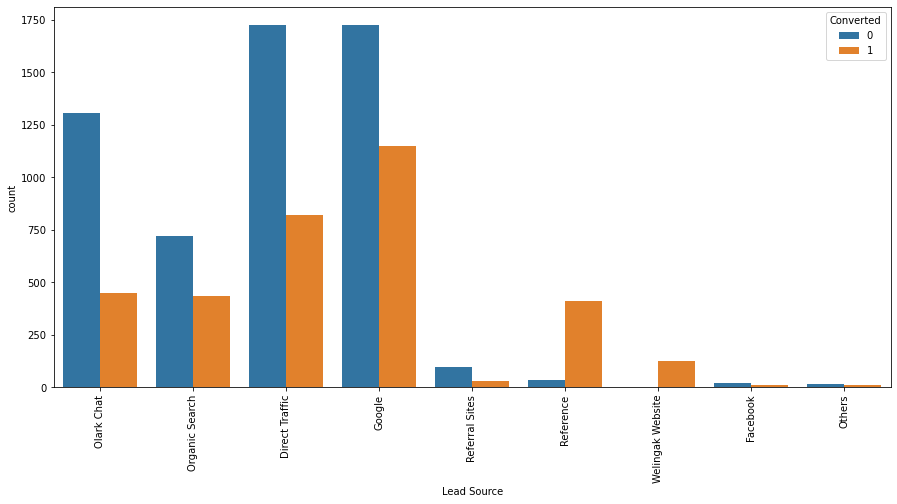

In [52]:
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

In [53]:
## We see max number of leads are generated by google / direct traffic. Max conversion ratio is by refrence and welingak website.

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

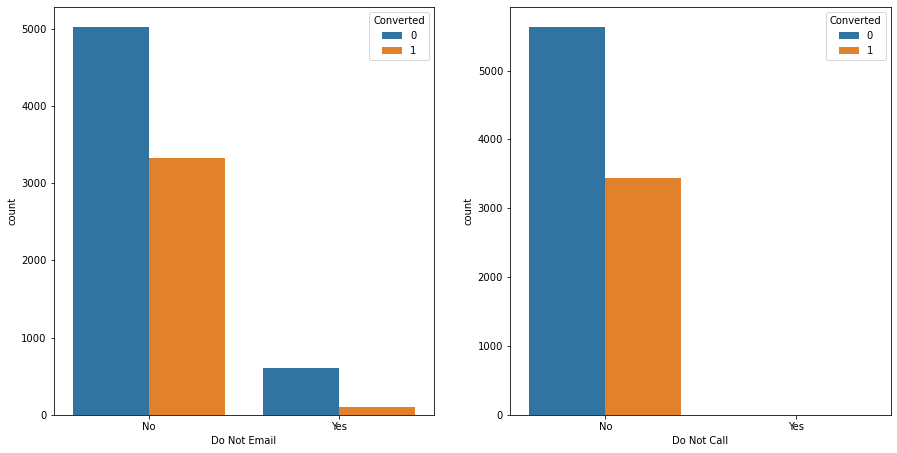

In [54]:
## Evaluating conversion ratio with Do not email and donot call
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])

<AxesSubplot:xlabel='TotalVisits'>

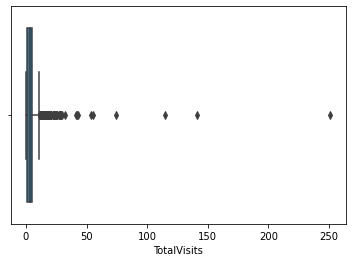

In [55]:
## Total visits 

sns.boxplot(df['TotalVisits'])


In [56]:
## we see outliers. Capping the outliers to 95% 
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [57]:
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]


<AxesSubplot:xlabel='TotalVisits'>

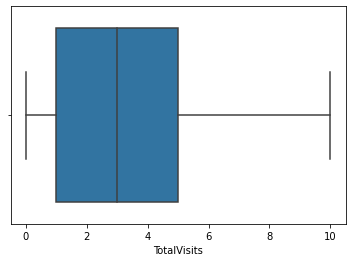

In [58]:
sns.boxplot(df['TotalVisits'])

In [59]:
## Cpomparing total visits with conversion ratio

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

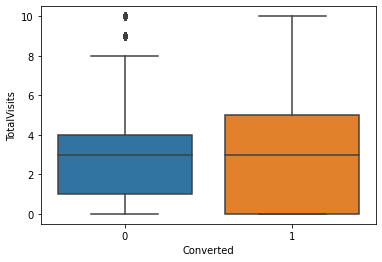

In [60]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)


In [61]:
## we see the medians are same. No conclusion drawn.

In [62]:
## evaluating total time spent on website. 

In [63]:
df['Total Time Spent on Website'].describe()


count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

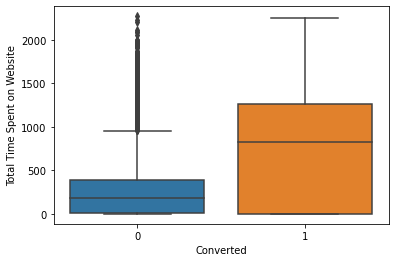

In [64]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)

In [65]:
## median of coverted leads are higher. leads who spent more time on website, more likely to convert.

<AxesSubplot:xlabel='Page Views Per Visit'>

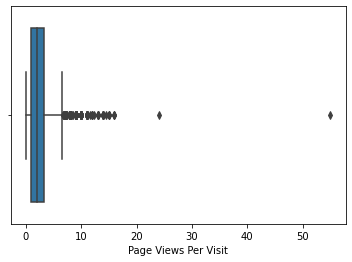

In [66]:
sns.boxplot(df['Page Views Per Visit'])


In [67]:
## there are outliers
df['Page Views Per Visit'].describe()


count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [68]:
## capping values at 95%

In [69]:
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

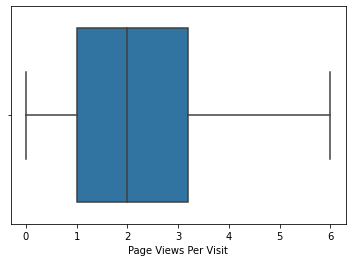

In [70]:
sns.boxplot(df['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

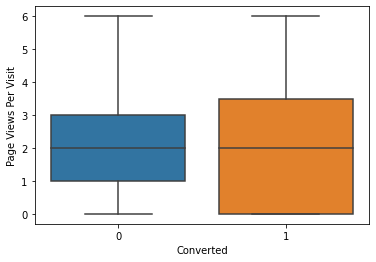

In [71]:
## evaluation of page views per visit with conversion

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)


In [72]:
## median is almost same. no conclusion to be drawn

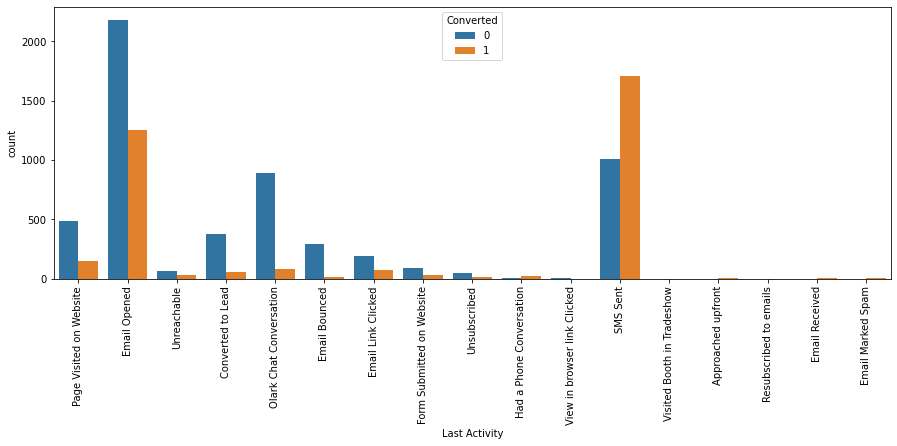

In [73]:
##evaluating last activity

fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

In [74]:
## club activities with small incidence into 1  i.e others

In [75]:
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

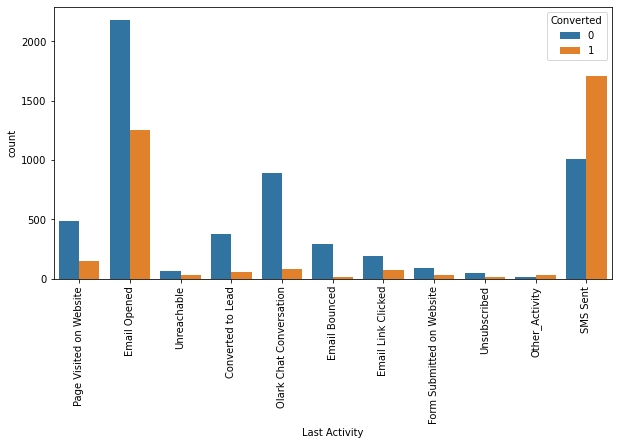

In [76]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

In [77]:
# most common last activity is email opened.highest rate = SMS Sent

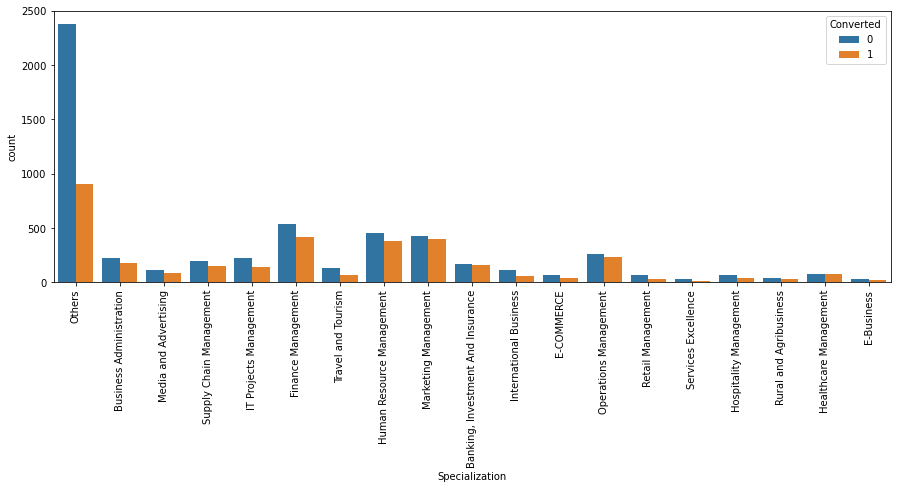

In [78]:
# conversion ratio with specialization
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

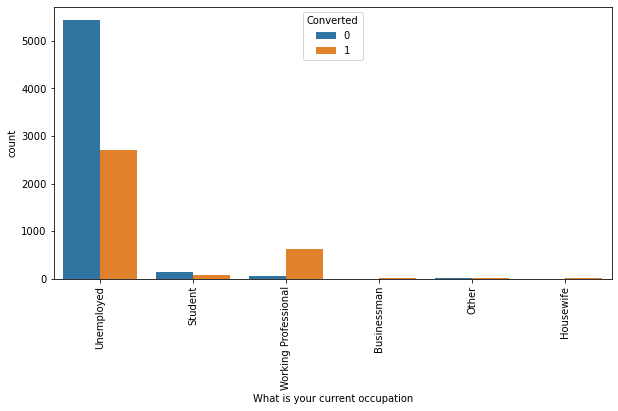

In [79]:
# focus on specializartion with high rate. 

## checking current occupation vs coverted

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
xticks(rotation = 90)
plt.show()

In [80]:
#max are unemployed. Max conversion with working professiona


In [81]:
# Dropping variables that are not contributing to analysis

In [82]:


data = df.drop(['Lead Number','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Activity','Tags','Last Notable Activity'],1)


In [83]:
data.shape

(9074, 12)

In [84]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Others,Unemployed,Mumbai
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Others,Unemployed,Mumbai
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business Administration,Student,Mumbai
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Others,Unemployed,Mumbai


In [85]:

perc_data = round(100*(len(df)/9240),2)
print (perc_data)

98.2


# Step 4 : Data Preparation



In [86]:
## Converting binary variables to 1/0

In [87]:
varlist =  ['Do Not Email', 'Do Not Call']

In [88]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [89]:
data[varlist] = data[varlist].apply(binary_map)

In [90]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Others,Unemployed,Mumbai
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Others,Unemployed,Mumbai
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Student,Mumbai
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Others,Unemployed,Mumbai


In [91]:
data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

In [92]:
## Converting multi-categorical variables and creating new dummy variables.

In [93]:
df1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City']], drop_first=True)
df1.head()


,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [94]:
data = pd.concat([data, df1], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Others,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Others,...,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Others,...,0,0,0,1,0,0,0,0,0,0


In [95]:
# dropping the original column for which dummy columns are derived
data = data.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation','City'], axis = 1)

In [96]:
data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [97]:
data.shape

(9074, 46)

# Step 6: Train and Test split

In [98]:
## preparing the data for split into train and test

In [99]:
X = data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [100]:
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 7 :Feature scaling 

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# Step 8: Training model

In [103]:
import statsmodels.api as sm

In [104]:
#making your first model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2916.7
Date:                Wed, 09 Feb 2022   Deviance:                       5833.4
Time:                        23:14:30   Pearson chi2:                 6.77e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5400      1.075      0.503      0.615      -1.566       2.646
Do Not Email                                            -1.4192      0.165     -8.584      0.000      -1.743      -1.095
Do Not Call                                             20.0493   3.36e+04      0.001      1.000   -6.58e+04    6.58e+04
TotalVisits                                              0.2134      0.051      4.226      0.000       0.114       0.312
Total Time Spent on Website                              1.1142      0.039     28.834      0.000       1.038       1.190
Page Views Per Visit                                    -0.1341      0.058     -2.322      0.020      -0.247      -0.021
Lead Origin_Landing Page Submission                     -0.7937      0.128     -6.209      0.000      -1.044      -0.543
Lead Origin_Lead Add Form                                1.7821      1.094      1.629      0.103      -0.361       3.926
Lead Origin_Lead Import                                 21.5716   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -20.3675   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.3407      0.092      3.722      0.000       0.161       0.520
Lead Source_Olark Chat                                   1.2193      0.148      8.256      0.000       0.930       1.509
Lead Source_Organic Search                               0.2170      0.122      1.774      0.076      -0.023       0.457
Lead Source_Others                                       0.5750      0.656      0.876      0.381      -0.711       1.861
Lead Source_Reference                                    2.3332      1.115      2.093      0.036       0.148       4.518
Lead Source_Referral Sites                              -0.2854      0.336     -0.850      0.395      -0.943       0.373
Lead Source_Welingak Website                             4.8544      1.310      3.706      0.000       2.287       7.422
Specialization_Business Administration                  -0.3507      0.231     -1.518      0.129      -0.804       0.102
Specialization_E-Business                               -0.0516      0.432     -0.119      0.905      -0.899       0.795
Specialization_E-COMMERCE                                0.0143      0.336      0.043      0.966      -0.644       0.672
Specialization_Finance Management                       -0.2573      0.192     -1.337      0.181      -0.635       0.120
Specialization_Healthcare Management                    -0.3279      0.303     -1.084      0.278      -0.921       0.265
Specialization_Hospitality Management                   -0

# Step 9 : Using RFE for feature selection

In [105]:

# using RFE for feature selection
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [106]:
rfe.support_


array([ True, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True,  True,  True, False, False, False, False,  True])

In [107]:
#getting all the details of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 18),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 5),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Others', False, 22),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 20),
 ('Specialization_E-Business', False, 27),
 ('Specialization_E-COMMERCE', False, 7),
 ('Specialization_Finance Management', False, 25),
 ('Specialization_Healthcare Management', False, 23),
 ('Specialization_Hospitality Management', False, 3),
 ('Specialization_Human Resource Management', False, 21),
 ('Specialization_IT Projects M

In [108]:
#Kepping the selected columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [109]:
#Removing the not-selected columns
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other', 'City_Other Citie

# Step 10: Creating and optimising the model by manual feature elimination

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2940.0
Date:                Wed, 09 Feb 2022   Deviance:                       5880.0
Time:                        23:14:35   Pearson chi2:                 6.85e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3891      0.606      0.641      0.521      -0.800       1.578
Do Not Email                                            -1.4828      0.163     -9.077      0.000      -1.803      -1.163
Total Time Spent on Website                              1.1098      0.038     29.046      0.000       1.035       1.185
Lead Origin_Landing Page Submission                     -0.9513      0.121     -7.839      0.000      -1.189      -0.713
Lead Origin_Lead Add Form                                1.9024      0.950      2.003      0.045       0.041       3.764
Lead Origin_Lead Import                                  0.8415      0.475      1.771      0.077      -0.090       1.773
Lead Source_Olark Chat                                   0.8430      0.113      7.469      0.000       0.622       1.064
Lead Source_Reference                                    1.8046      0.972      1.856      0.063      -0.101       3.710
Lead Source_Referral Sites                              -0.4878      0.324     -1.507      0.132      -1.122       0.147
Lead Source_Welingak Website                             4.3656      1.191      3.665      0.000       2.031       6.700
Specialization_Others                                   -1.1785      0.117    -10.060      0.000      -1.408      -0.949
What is your current occupation_Housewife               22.0027   1.51e+04      0.001      0.999   -2.96e+04    2.96e+04
What is your current occupation_Student                 -0.2379      0.638     -0.373      0.709      -1.487       1.012
What is your current occupation_Unemployed              -0.4544      0.603     -0.754      0.451      -1.636       0.727
What is your current occupation_Working Professional     2.2047      0.629      3.507      0.000       0.973       3.437
City_Tier II Cities                                     -0.6377      0.417     -1.530      0.126      -1.455       0.179
========================================================================================================================
"""

In [111]:
#Reomve the feature with highest P-value

col1 = col.drop('What is your current occupation_Housewife',1)

In [112]:
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [113]:
#model-3
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2942.3
Date:                Wed, 09 Feb 2022   Deviance:                       5884.6
Time:                        23:14:35   Pearson chi2:                 6.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8774      0.567      1.548      0.122      -0.233       1.988
Do Not Email                                            -1.4859      0.163     -9.088      0.000      -1.806      -1.165
Total Time Spent on Website                              1.1086      0.038     29.037      0.000       1.034       1.183
Lead Origin_Landing Page Submission                     -0.9458      0.121     -7.800      0.000      -1.183      -0.708
Lead Origin_Lead Add Form                                1.9042      0.950      2.005      0.045       0.043       3.765
Lead Origin_Lead Import                                  0.8434      0.475      1.775      0.076      -0.088       1.775
Lead Source_Olark Chat                                   0.8433      0.113      7.473      0.000       0.622       1.065
Lead Source_Reference                                    1.8073      0.972      1.860      0.063      -0.098       3.712
Lead Source_Referral Sites                              -0.4864      0.324     -1.503      0.133      -1.121       0.148
Lead Source_Welingak Website                             4.3652      1.191      3.665      0.000       2.031       6.699
Specialization_Others                                   -1.1762      0.117    -10.047      0.000      -1.406      -0.947
What is your current occupation_Student                 -0.7303      0.599     -1.220      0.222      -1.903       0.443
What is your current occupation_Unemployed              -0.9465      0.562     -1.685      0.092      -2.047       0.154
What is your current occupation_Working Professional     1.7120      0.589      2.907      0.004       0.558       2.867
City_Tier II Cities                                     -0.6381      0.417     -1.531      0.126      -1.455       0.179
========================================================================================================================
"""

In [114]:
#Reomve the feature with highest P-value
col2 = col1.drop('What is your current occupation_Student',1)

In [115]:
#Model-4
X_train_sm = sm.add_constant(X_train[col2])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2943.1
Date:                Wed, 09 Feb 2022   Deviance:                       5886.2
Time:                        23:14:35   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2479      0.222      1.115      0.265      -0.188       0.684
Do Not Email                                            -1.4847      0.163     -9.093      0.000      -1.805      -1.165
Total Time Spent on Website                              1.1093      0.038     29.061      0.000       1.035       1.184
Lead Origin_Landing Page Submission                     -0.9536      0.121     -7.877      0.000      -1.191      -0.716
Lead Origin_Lead Add Form                                1.9009      0.950      2.001      0.045       0.039       3.763
Lead Origin_Lead Import                                  0.8392      0.475      1.765      0.077      -0.092       1.771
Lead Source_Olark Chat                                   0.8402      0.113      7.447      0.000       0.619       1.061
Lead Source_Reference                                    1.8103      0.972      1.862      0.063      -0.095       3.716
Lead Source_Referral Sites                              -0.4875      0.324     -1.506      0.132      -1.122       0.147
Lead Source_Welingak Website                             4.3674      1.191      3.666      0.000       2.033       6.702
Specialization_Others                                   -1.1829      0.117    -10.115      0.000      -1.412      -0.954
What is your current occupation_Unemployed              -0.3097      0.196     -1.583      0.113      -0.693       0.074
What is your current occupation_Working Professional     2.3486      0.265      8.872      0.000       1.830       2.867
City_Tier II Cities                                     -0.6383      0.417     -1.531      0.126      -1.455       0.179
========================================================================================================================
"""

In [116]:
#Reomve the feature with highest P-value
col3 = col2.drop('Lead Source_Referral Sites',1)

In [117]:
#model-5
X_train_sm = sm.add_constant(X_train[col3])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2944.3
Date:                Wed, 09 Feb 2022   Deviance:                       5888.6
Time:                        23:14:35   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2369      0.222      1.066      0.286      -0.199       0.673
Do Not Email                                            -1.4833      0.163     -9.085      0.000      -1.803      -1.163
Total Time Spent on Website                              1.1104      0.038     29.087      0.000       1.036       1.185
Lead Origin_Landing Page Submission                     -0.9405      0.121     -7.794      0.000      -1.177      -0.704
Lead Origin_Lead Add Form                                1.9177      0.951      2.016      0.044       0.053       3.782
Lead Origin_Lead Import                                  0.8588      0.475      1.806      0.071      -0.073       1.791
Lead Source_Olark Chat                                   0.8630      0.112      7.708      0.000       0.644       1.082
Lead Source_Reference                                    1.8146      0.974      1.864      0.062      -0.094       3.723
Lead Source_Welingak Website                             4.3742      1.192      3.669      0.000       2.037       6.711
Specialization_Others                                   -1.1904      0.117    -10.195      0.000      -1.419      -0.962
What is your current occupation_Unemployed              -0.3143      0.196     -1.606      0.108      -0.698       0.069
What is your current occupation_Working Professional     2.3417      0.265      8.843      0.000       1.823       2.861
City_Tier II Cities                                     -0.6365      0.417     -1.527      0.127      -1.453       0.180
========================================================================================================================
"""

In [118]:
col4 = col3.drop('City_Tier II Cities',1)

In [119]:
#model-6
X_train_sm = sm.add_constant(X_train[col4])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2945.5
Date:                Wed, 09 Feb 2022   Deviance:                       5891.1
Time:                        23:14:35   Pearson chi2:                 6.87e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2414      0.222      1.086      0.277      -0.194       0.677
Do Not Email                                            -1.4943      0.163     -9.159      0.000      -1.814      -1.175
Total Time Spent on Website                              1.1098      0.038     29.091      0.000       1.035       1.185
Lead Origin_Landing Page Submission                     -0.9472      0.121     -7.855      0.000      -1.184      -0.711
Lead Origin_Lead Add Form                                1.9170      0.951      2.015      0.044       0.053       3.781
Lead Origin_Lead Import                                  0.8580      0.475      1.805      0.071      -0.074       1.790
Lead Source_Olark Chat                                   0.8620      0.112      7.701      0.000       0.643       1.081
Lead Source_Reference                                    1.8151      0.974      1.864      0.062      -0.093       3.723
Lead Source_Welingak Website                             4.3767      1.192      3.671      0.000       2.040       6.713
Specialization_Others                                   -1.1898      0.117    -10.188      0.000      -1.419      -0.961
What is your current occupation_Unemployed              -0.3188      0.196     -1.630      0.103      -0.702       0.065
What is your current occupation_Working Professional     2.3343      0.265      8.818      0.000       1.815       2.853
========================================================================================================================
"""

In [120]:
#Reomve the feature with highest P-value
col5 = col4.drop('What is your current occupation_Unemployed',1)

In [121]:
#Model-7
X_train_sm = sm.add_constant(X_train[col5])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2946.8
Date:                Wed, 09 Feb 2022   Deviance:                       5893.7
Time:                        23:14:36   Pearson chi2:                 6.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0672      0.116     -0.580      0.562      -0.294       0.160
Do Not Email                                            -1.4943      0.163     -9.159      0.000      -1.814      -1.175
Total Time Spent on Website                              1.1099      0.038     29.097      0.000       1.035       1.185
Lead Origin_Landing Page Submission                     -0.9480      0.121     -7.856      0.000      -1.184      -0.711
Lead Origin_Lead Add Form                                1.9083      0.952      2.005      0.045       0.043       3.773
Lead Origin_Lead Import                                  0.8497      0.475      1.787      0.074      -0.082       1.781
Lead Source_Olark Chat                                   0.8654      0.112      7.731      0.000       0.646       1.085
Lead Source_Reference                                    1.8263      0.974      1.875      0.061      -0.082       3.735
Lead Source_Welingak Website                             4.3816      1.193      3.674      0.000       2.044       6.719
Specialization_Others                                   -1.1937      0.117    -10.211      0.000      -1.423      -0.965
What is your current occupation_Working Professional     2.6436      0.185     14.309      0.000       2.282       3.006
========================================================================================================================
"""

In [122]:
#Reomve the feature with highest P-value
col6 = col5.drop('Lead Origin_Lead Import',1)

In [123]:
# Model-8

X_train_sm = sm.add_constant(X_train[col6])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2948.3
Date:                Wed, 09 Feb 2022   Deviance:                       5896.6
Time:                        23:14:36   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0329      0.114     -0.287      0.774      -0.257       0.191
Do Not Email                                            -1.4959      0.163     -9.173      0.000      -1.816      -1.176
Total Time Spent on Website                              1.1037      0.038     29.106      0.000       1.029       1.178
Lead Origin_Landing Page Submission                     -0.9792      0.120     -8.190      0.000      -1.214      -0.745
Lead Origin_Lead Add Form                                1.8816      0.952      1.977      0.048       0.016       3.747
Lead Source_Olark Chat                                   0.8432      0.111      7.592      0.000       0.626       1.061
Lead Source_Reference                                    1.8257      0.974      1.874      0.061      -0.084       3.735
Lead Source_Welingak Website                             4.3887      1.193      3.679      0.000       2.051       6.727
Specialization_Others                                   -1.2138      0.117    -10.403      0.000      -1.443      -0.985
What is your current occupation_Working Professional     2.6437      0.185     14.310      0.000       2.282       3.006
========================================================================================================================
"""

In [124]:
#dropping feature with highest P-value
col7 = col6.drop('Lead Source_Reference',1)

In [125]:
#Model-9
X_train_sm = sm.add_constant(X_train[col7])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.8
Date:                Wed, 09 Feb 2022   Deviance:                       5899.5
Time:                        23:14:36   Pearson chi2:                 6.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0331      0.114     -0.290      0.772      -0.257       0.191
Do Not Email                                            -1.4922      0.163     -9.163      0.000      -1.811      -1.173
Total Time Spent on Website                              1.1032      0.038     29.092      0.000       1.029       1.178
Lead Origin_Landing Page Submission                     -0.9791      0.120     -8.192      0.000      -1.213      -0.745
Lead Origin_Lead Add Form                                3.6380      0.230     15.789      0.000       3.186       4.090
Lead Source_Olark Chat                                   0.8412      0.111      7.569      0.000       0.623       1.059
Lead Source_Welingak Website                             2.6299      0.752      3.497      0.000       1.156       4.104
Specialization_Others                                   -1.2126      0.117    -10.399      0.000      -1.441      -0.984
What is your current occupation_Working Professional     2.6449      0.185     14.323      0.000       2.283       3.007
========================================================================================================================
"""

# Step 11 : y_pred on the train test 

In [126]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.233441
1012    0.158718
9226    0.200220
4750    0.690140
7987    0.770954
1281    0.499801
2880    0.120842
4971    0.887683
7536    0.881971
1248    0.738387
dtype: float64

In [127]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23344095, 0.15871846, 0.20022036, 0.69014016, 0.77095384,
       0.49980102, 0.12084201, 0.88768342, 0.88197083, 0.7383871 ])

In [128]:
## table between actual churn and predicted values

In [129]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.233441,3009
1,0,0.158718,1012
2,0,0.200220,9226
3,1,0.690140,4750
4,1,0.770954,7987


In [130]:
## normalizing the coverted_prob to predicted value by putting condition >0.5 

In [131]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [132]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.233441,3009,0
1,0,0.158718,1012,0
2,0,0.200220,9226,0
3,1,0.690140,4750,1
4,1,0.770954,7987,1


# Step 12: Evaluation metrices for y_train_pred

In [133]:
from sklearn import metrics


confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3429  476]
 [ 887 1559]]


In [134]:
## wrong predictions are 128+ 749

In [135]:
## checking overall accuracy

In [136]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7853881278538812


In [137]:
## Checking VIFs

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,1.86
6,Specialization_Others,1.79
3,Lead Origin_Lead Add Form,1.52
5,Lead Source_Welingak Website,1.36
1,Total Time Spent on Website,1.26
2,Lead Origin_Landing Page Submission,1.17
7,What is your current occupation_Working Profes...,1.17
0,Do Not Email,1.11


In [140]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [141]:
##calculating sensitivity 

In [142]:
TP / float(TP+FN)

0.6373671300081766

In [143]:
## Calculating specificity 

In [144]:
TN / float(TN+FP)

0.8781049935979514

In [145]:
## Calculating rate of false positives

In [146]:
print(FP/ float(TN+FP))

0.12189500640204866


In [147]:
## calculating positive predictive value

In [148]:
print (TP / float(TP+FP))

0.7660933660933661


In [149]:
## calculating negative predictive value

In [150]:
print (TN / float(TN+ FN))

0.7944856348470807


In [151]:
## ROC Curve

In [152]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [153]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

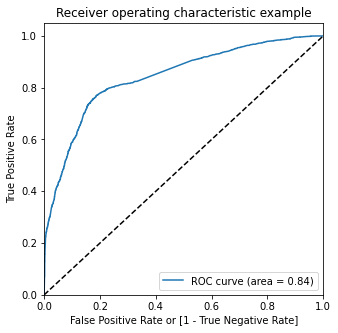

In [154]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# Step 13: Finding balance between specificity and sensitivity

In [155]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.233441,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.158718,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.200220,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.690140,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.770954,7987,1,1,1,1,1,1,1,1,1,0,0


In [156]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


In [157]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.449693  0.992232  0.109859
0.2   0.2  0.640372  0.904742  0.474776
0.3   0.3  0.793891  0.774325  0.806146
0.4   0.4  0.800504  0.727719  0.846095
0.5   0.5  0.785388  0.637367  0.878105
0.6   0.6  0.773422  0.548242  0.914469
0.7   0.7  0.750905  0.441128  0.944942
0.8   0.8  0.729019  0.338921  0.973367
0.9   0.9  0.704456  0.246525  0.991293


In [158]:
## Plot for sensitivity and specificity

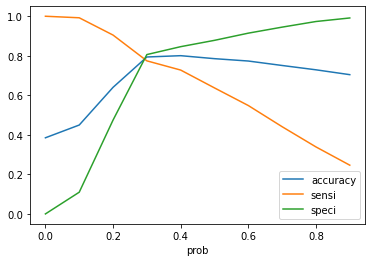

In [159]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [160]:
## 0.3 seems like the optimum point

In [161]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.233441,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.158718,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.200220,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.690140,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.770954,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [162]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.233441,3009,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.158718,1012,0,1,1,0,0,0,0,0,0,0,0,0,16
2,0,0.200220,9226,0,1,1,1,0,0,0,0,0,0,0,0,20
3,1,0.690140,4750,1,1,1,1,1,1,1,1,0,0,0,1,69
4,1,0.770954,7987,1,1,1,1,1,1,1,1,1,0,0,1,77


# checking overall accuracy

In [163]:


confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [164]:
#Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7938907258699417

In [165]:
## sensitivity

In [166]:
TP / float(TP+FN)

0.7743254292722813

In [167]:
## specificity

In [168]:
TN / float(TN+FP)

0.806145966709347

In [169]:
# calculate false postive rate

In [170]:
print(FP/ float(TN+FP))

0.193854033290653


In [171]:
# Positive and negative predictive value

In [172]:
print (TP / float(TP+FP))

0.7144473783477933


In [173]:
print (TN / float(TN+ FN))

0.8508108108108108


# Precision and recall

In [174]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3429,  476],
       [ 887, 1559]], dtype=int64)

In [175]:
#precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7660933660933661

In [176]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6373671300081766

# precision and recall tradeoff

In [177]:
from sklearn.metrics import precision_recall_curve

In [178]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [179]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

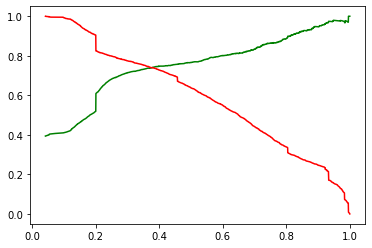

In [180]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 14 : Making predictions on test set

In [181]:
X_test.shape

(2723, 44)

In [182]:
y_test.shape

(2723,)

In [183]:
# Transforming the test set as per the scaling of the train set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3271,0,0,0.284772,-0.600595,0.955505,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1490,0,0,0.643547,1.887326,1.510766,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7936,0,0,-0.432779,-0.752879,-0.155018,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4216,0,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.719873,-0.587751,2.066027,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [184]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3271,0,0,0.284772,-0.600595,0.955505,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1490,0,0,0.643547,1.887326,1.510766,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7936,0,0,-0.432779,-0.752879,-0.155018,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4216,0,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.719873,-0.587751,2.066027,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [185]:
# Fitting with the columns of the train set

X_test = X_test[col7]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Others,What is your current occupation_Working Professional
3271,0,-0.600595,0,0,0,0,1,0
1490,0,1.887326,1,0,0,0,0,1
7936,0,-0.752879,0,0,0,0,1,0
4216,0,-0.888650,0,1,0,0,0,0
3830,0,-0.587751,1,0,0,0,0,0


In [186]:
X_test.shape

(2723, 8)

In [187]:
#adding constant

X_test_sm = sm.add_constant(X_test)

In [188]:
# Creating a dataframe of predicted values
y_test_pred = res.predict(X_test_sm)

In [189]:
y_test_pred[:10]

3271    0.129175
1490    0.976222
7936    0.111424
4216    0.932423
3830    0.159680
1800    0.691300
6507    0.150401
4821    0.351582
4223    0.804071
4714    0.200220
dtype: float64

In [190]:
# Creating a final dataframe 

y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.129175
1,1,1490,0.976222
2,0,7936,0.111424
3,1,4216,0.932423
4,0,3830,0.159680


In [191]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.129175
1,1,1490,0.976222
2,0,7936,0.111424
3,1,4216,0.932423
4,0,3830,0.159680


In [192]:
# Getting final predicted values as per the optimal cut-off


y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [193]:
y_pred_final.head(10)

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.129175,0
1,1,1490,0.976222,1
2,0,7936,0.111424,0
3,1,4216,0.932423,1
4,0,3830,0.159680,0
5,1,1800,0.691300,1
6,0,6507,0.150401,0
7,0,4821,0.351582,1
8,1,4223,0.804071,1
9,0,4714,0.200220,0


# overall accuracy



In [194]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7961806830701432

In [195]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1403,  331],
       [ 224,  765]], dtype=int64)

# sensitivity specificity

In [196]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [197]:
## sensitivity
TP / float(TP+FN)

0.7735085945399394

In [198]:
#specificity
TN / float(TN+FP)

0.8091118800461361

# Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 80%
Sensitivity : 77%
Specificity : 80%
Test Data: 
Accuracy : 80%
Sensitivity : 77%
Specificity : 80% 




The model seems to be performing well. The ROC curve has a value of 0.85, which is a decent value. 

'''

# Model Interpretation:

The Sensitivity, Specificity, Accuracy, Precision and Recall score we got from test set in acceptable range.
In business terms, this model has an ability to adjust with the company’s requirements in coming future.
This concludes that the model is in stable state.
Recommandations for the company:

Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :

Lead Source_Olark Chat	
Specialization_Others	
Lead Origin_Lead Add Form	
Lead Source_Welingak Website	
Total Time Spent on Website

Lead Origin_Landing Page Submission	
What is your current occupation_Working Professionals
Do Not Email


'''
